In [ ]:
from google.colab import files
uploaded= files.upload()
print(uploaded)

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
{'BIKE DETAILS.csv': b"name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price\r\nRoyal Enfield Classic 350,175000,2019,Individual,1st owner,350,\r\nHonda Dio,45000,2017,Individual,1st owner,5650,\r\nRoyal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114\r\nYamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643\r\nYamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,\r\nHonda CB Twister,18000,2010,Individual,1st owner,60000,53857\r\nHonda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719\r\nRoyal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,\r\nHero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,\r\nBajaj Discover 125,50000,2016,Individual,1st owner,42000,60122\r\nYamaha FZ16,35000,2015,Individual,1st owner,32000,78712\r\nHonda Navi,28000,2016,Individual,2nd owner,10000,47255\r\nBajaj Avenger Street 220,80000,2018,Individual,1st o

In [ ]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

print(df.head(10))

print('Shape:', df.shape)

print('Columns:', df.columns.tolist())

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [ ]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
print(df.isnull().sum())

df['km_driven'] = df['km_driven'].fillna(df['km_driven'].median())
df['seller_type'] = df['seller_type'].fillna(df['seller_type'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
print("Missing values handled. New missing value counts:")
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Missing values handled. New missing value counts:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


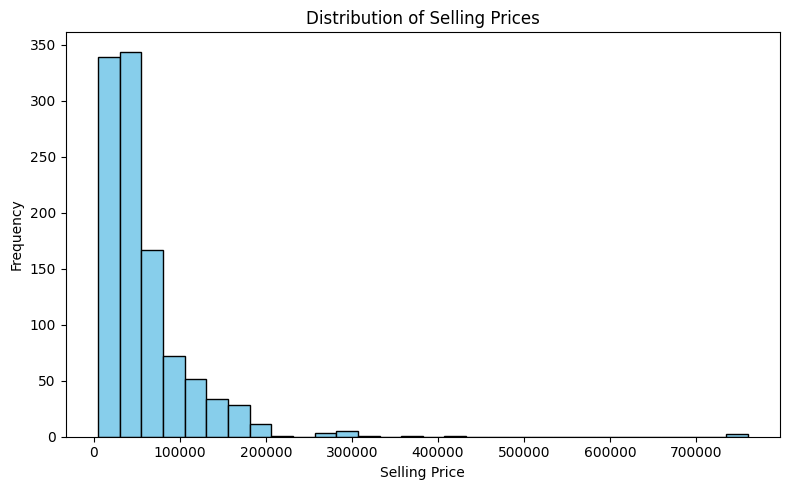

In [ ]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.tight_layout()
plt.show()

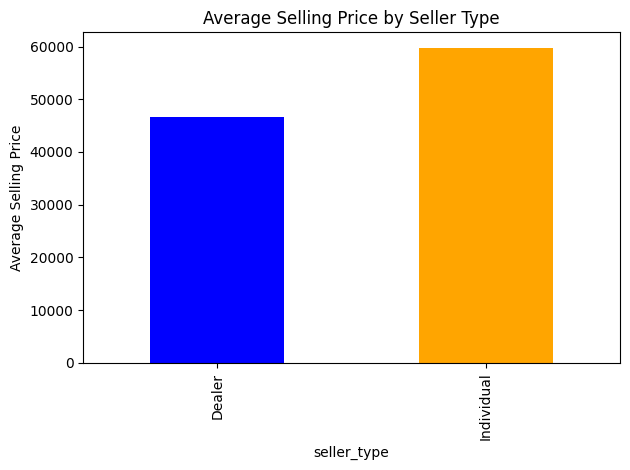

In [ ]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import matplotlib.pyplot as plt

seller_avg = df.groupby('seller_type')['selling_price'].mean()
seller_avg.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.tight_layout()
plt.show()

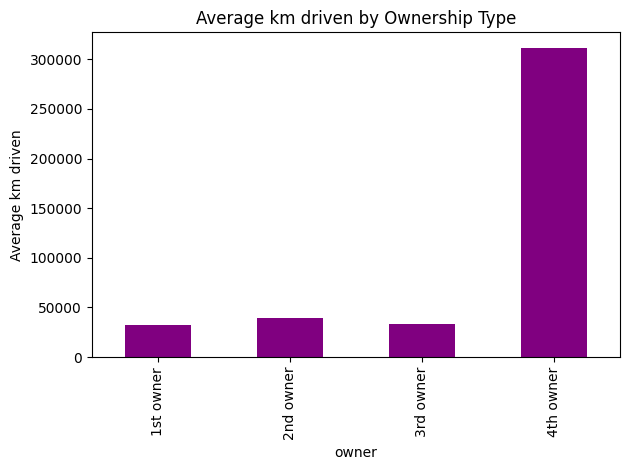

In [ ]:
#Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


ownership_avg = df.groupby('owner')['km_driven'].mean()
ownership_avg.plot(kind='bar', color='purple')
plt.ylabel('Average km driven')
plt.title('Average km driven by Ownership Type')
plt.tight_layout()
plt.show()

In [ ]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

print("Before Outlier Removal:\n", df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
mask = (df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)
filtered_df = df[mask]

# After
print("After Outlier Removal:\n", filtered_df['km_driven'].describe())

Before Outlier Removal:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After Outlier Removal:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


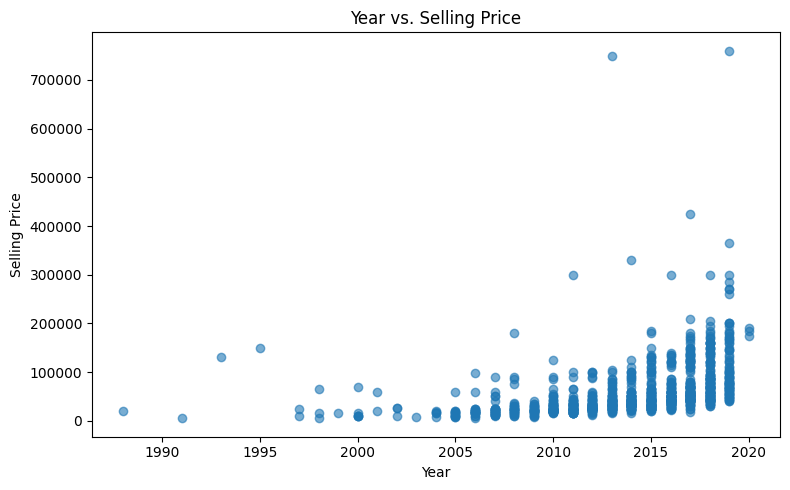

In [ ]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs. Selling Price')
plt.tight_layout()
plt.show()

In [ ]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


df_encoded = pd.get_dummies(df, columns=['seller_type'])
print(df_encoded.head(5))

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


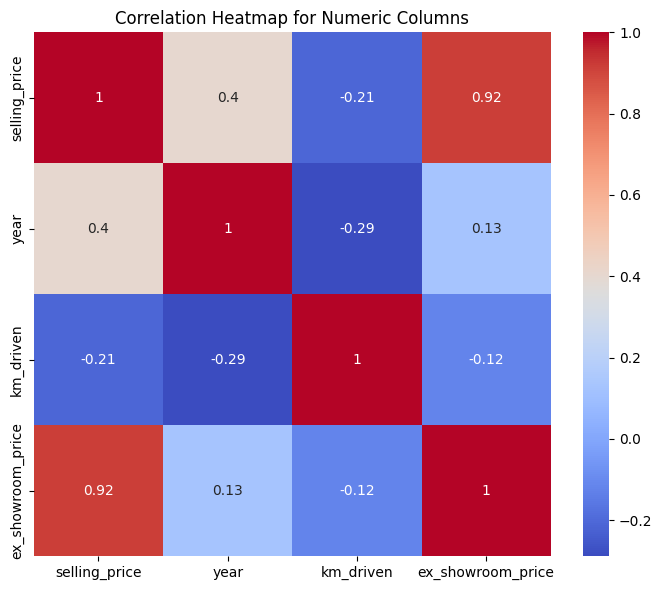

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [ ]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import seaborn as sns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns')
plt.tight_layout()
plt.show()
print(corr_matrix)

In [ ]:
#Question 10:
'''
Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
'''

print("Most important factors affecting selling price:")
print("- Year of bike\n- Km driven\n- Ownership type\n- Seller type")
print("\nData cleaning performed:")
print("- Imputed missing values\n- Removed outliers with IQR")
print("\nFeature engineering performed:")
print("- One-hot encoding (for sellertype)")

Most important factors affecting selling price:
- Year of bike
- Km driven
- Ownership type
- Seller type

Data cleaning performed:
- Imputed missing values
- Removed outliers with IQR

Feature engineering performed:
- One-hot encoding (for sellertype)
